In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from os.path import join, expanduser, dirname, basename, exists
import pickle

constant_dir = expanduser('~/Documents/temp/src/functions/constants/')
meas_dir = expanduser('~/Documents/temp/data/snowschool/station/')

with open(join(meas_dir, 'df.pkl'), 'rb') as f:
    meas = pickle.load(f)

with open(join(constant_dir, 'sensor_heights.pkl'), 'rb') as f:
    sensor_heights = pickle.load(f)

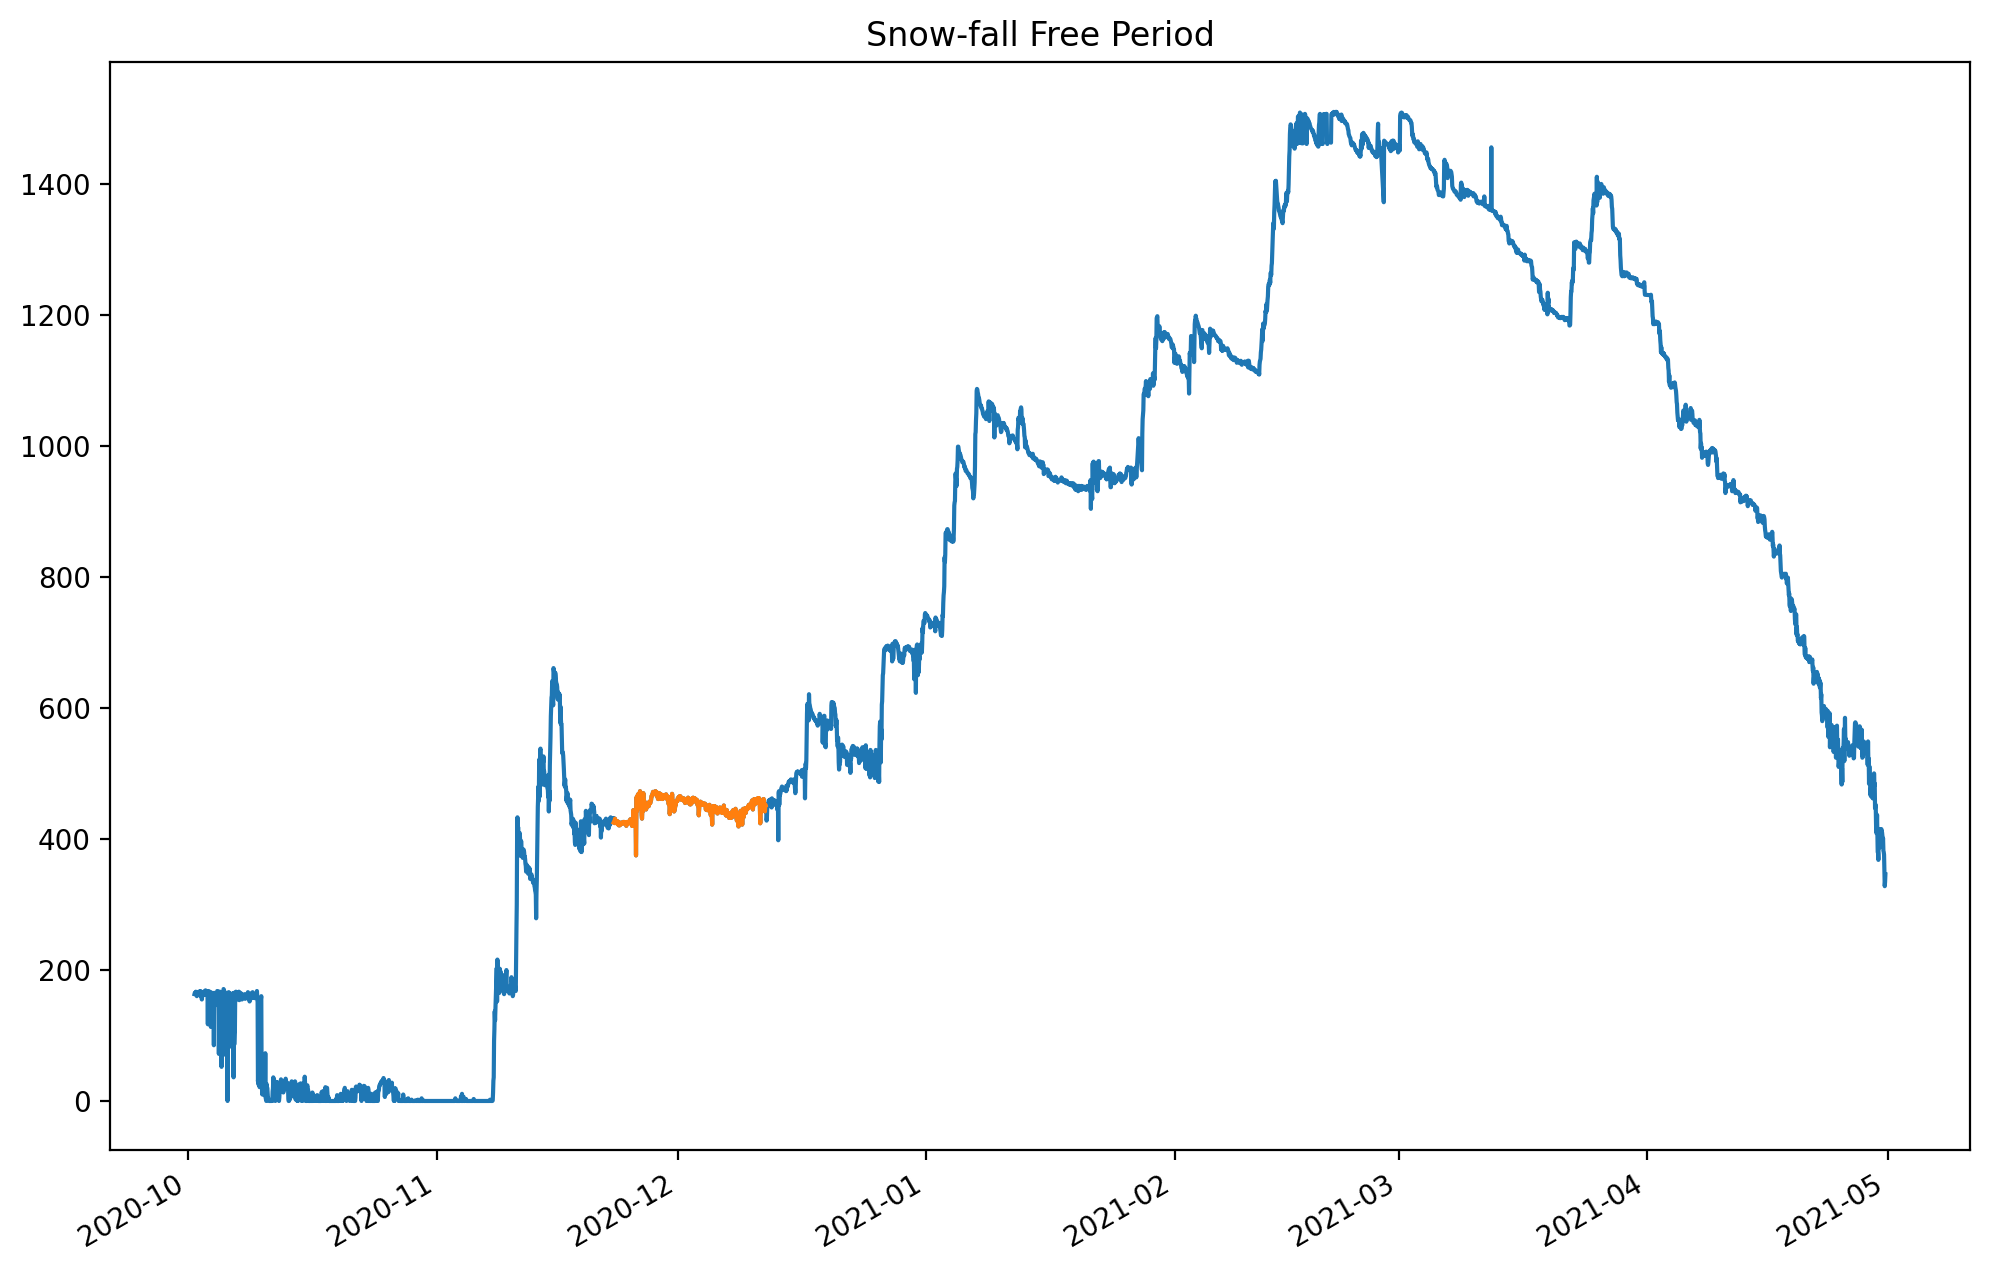

In [5]:
fig,ax = plt.subplots(figsize= (12,8), dpi = 200)
meas.snow_depth_1.plot(ax = ax)
sub = meas[pd.to_datetime('2020-11-23T00:00').tz_localize('US/Mountain'):pd.to_datetime('2020-12-11T23:00').tz_localize('US/Mountain')]
sub.snow_depth_1.plot(ax = ax)
plt.title('Snow-fall Free Period')
plt.savefig(join('/Users/zachkeskinen/Documents/temp/figures/phase_diffusivities', 'snow-free-snowfig.png'))

In [38]:
air_temp_cols = [c for c in sub.columns if 'air_temp' in c and c != 'air_temp_1']

In [39]:
sub = sub[air_temp_cols]

In [40]:
index = []
for i in sub.index.strftime('%Y-%m-%d %H:%M:%s'):
    index.append(i[:19])
sub.index = index

In [41]:
sub.index[0]

'2020-11-18 00:00:16'

In [27]:
sub[air_temp_cols].to_csv(join(meas_dir,'iflow_sub.csv'))